In [1]:
import numpy as np

from py.simulation import *
from py.estimation import *
from py.features import *
from py.utils import *

from importlib import reload

from matplotlib import pyplot as plt

In [2]:
n = 20

n_rounds = 70
lam = .9
beta = np.array([2.8, -1])

In [3]:
A0 = np.ones((n,n)) + np.random.randint(2, size = (n,n))

T = simulate(A0, 
             n_rounds = n_rounds, 
             lam = lam, 
             feature = lambda A: SR_quadratic_feature(A), 
             beta = beta, 
             m_updates = 400, 
             method = 'stochastic')

A = state_matrix(T, A0 = A0, lam = lam)

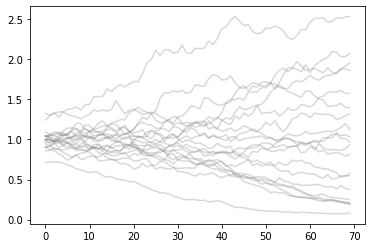

In [4]:
S = SR_quadratic_feature(A)

GAMMA = softmax(S, beta).sum(axis = 1)

# GAMMA = np.sort(GAMMA, axis = 1)
p = plt.plot(GAMMA, color = 'grey', alpha = .3)

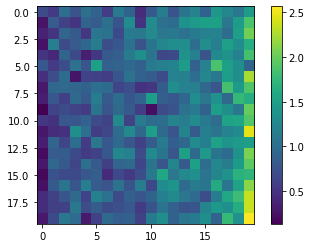

In [5]:
i = int(n_rounds/2)

plt.imshow(matrix_sort(A[i], GAMMA[i]))
plt.colorbar()

In [11]:
grid = 21
M = np.zeros((grid, grid))

X = np.linspace(beta[0] - 2, beta[0] + 2, grid)
Y = np.linspace(beta[1] - 2, beta[1] + 2, grid)
x, y = np.meshgrid(X, Y)
for i in range(grid):
    for j in range(grid):
        M[i,j] = ll(T, S, beta = np.array([x[i,j], y[i,j]]))

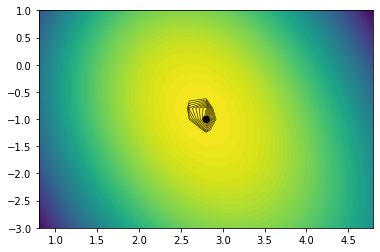

In [12]:
plt.contourf(x, y, M, levels = 100)

plt.contour(x, y, M, 
            levels = np.linspace(M.max() - 10, M.max(), 10),
               linewidths = .5, 
               colors = 'black', 
               linestyles = 'solid')

plt.scatter(x = beta[0], y = beta[1], color = 'black')
ix = np.where(M == M.max())
plt.scatter(X[ix[1]], Y[ix[0]], color = 'black', facecolor='none')
# plt.colorbar()

So we have some very strange behavior here, where our ability to estimate the parameter **degrades** with the number of observations (in some cases). Could be a bug?

In [13]:
res = ML(T, S, b0 = np.array([0,0]))

In [14]:
res['x']

array([ 2.75680937, -0.90761197])

In [17]:
np.sqrt(np.diag(res['hess_inv']))

array([0.00773035, 0.01100175])